In [2]:
# 현재 가상환경에 설치되어 있는 라이브러리 리스트 확인하기
# !pip list


In [3]:
# ! pip install scikit-survival
# ! pip install lifelines

In [ ]:
# 모델 분석에 필요한 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
import platform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# 모듈로 구현한 데이터 분석용 클래스 import 
from modules.DataAnalysis import DataCheck
from modules.DataAnalysis import DataPreprocessing
from modules.DataAnalysis import DataVisualize
import modules.DataModify as DataModify
import modules.ModelAnalysis as ModelAnalysis

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
### 데이터 로드

input_file_path = './data/Tree_data.csv'

df = pd.read_csv(input_file_path)

### 객체 인스턴스 생성
dc = DataCheck(df)
dp = DataPreprocessing(df)
dv = DataVisualize(df)

In [7]:
drop_cols = ['No', 'Plot', 'Adult', 'Subplot', 'Core', 'Census', 'Time']
dp.set_drop_cols(drop_cols)

encode = dp.run(encoding='label', return_anomaly=False)

In [8]:
alive_data = encode[encode['Alive'] != 1]
censored_data = encode[encode['Alive'] == 1]

train_set, test_set = DataModify.train_test_split_ignore_censored(alive_data, censored_data)

# (train_set[0] : X_train, train_set[1] : y_train, test_set[0] : X_test, test_set[1] : y_test)

print(train_set[1].value_counts())

Alive
0    1805
1     561
Name: count, dtype: int64


In [9]:
train_set[0]

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC
2709,3,0.091,0,0,0,2,0,0,0,22.24,0.00,1.54,10.50,13.96
2272,0,0.060,1,4,1,1,0,2,1,5.70,0.00,1.08,9.00,9.03
1580,2,0.055,1,3,0,0,1,1,1,15.04,28.28,5.13,20.24,18.82
2391,0,0.051,1,0,0,0,0,0,0,24.55,0.00,0.66,9.37,9.28
546,2,0.076,0,4,1,1,1,2,1,12.51,3.48,4.12,25.43,11.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1,0.095,0,0,0,0,1,0,1,5.00,11.43,5.46,18.66,21.91
164,2,0.087,0,0,0,0,1,0,1,18.00,26.67,3.94,27.62,11.09
353,1,0.087,0,1,0,0,1,1,1,33.00,33.33,6.80,20.68,19.26
1365,1,0.140,2,5,0,0,1,0,1,6.00,44.44,7.21,20.72,20.38


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_train, y_train = train_set
X_test, y_test = test_set

# y_train 처리
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # 첫 번째 열 선택
y_train = y_train.values.ravel()
y_train = y_train.astype(int)

# y_test 처리
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]  # 첫 번째 열 선택
y_test = y_test.values.ravel()
y_test = y_test.astype(int)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2366, 14), (416, 14), (2366,), (416,))

In [12]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [13]:
test_set

[      Species  Light_ISF  Light_Cat  Soil  Sterile  Conspecific  Myco  \
 40          3      0.108          0     3        0            0     0   
 2763        1      0.087          0     1        0            0     1   
 463         3      0.061          1     2        0            0     0   
 1119        0      0.087          0     0        0            0     0   
 32          1      0.106          0     2        0            0     1   
 ...       ...        ...        ...   ...      ...          ...   ...   
 2168        0      0.066          1     1        0            0     0   
 345         0      0.065          1     6        0            0     0   
 1504        3      0.086          0     6        0            0     0   
 2572        2      0.078          0     6        0            0     1   
 2589        1      0.060          1     3        0            0     1   
 
       SoilMyco  PlantDate    AMF    EMF  Phenolics  Lignin    NSC  
 40           1          0  37.91   0.00 

In [14]:
# 랜덤포레스트 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def evaluate_binary_classification(y_true, y_pred):
    print('Accuracy        :', accuracy_score(y_true, y_pred)),
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred)),
    print('Precision       :', precision_score(y_true, y_pred)),
    print('Recall          :', recall_score(y_true, y_pred)),
    print('F1 Score        :', f1_score(y_true, y_pred))

    ModelAnalysis.show_confusion_matrix(confusion_matrix(y_true, y_pred))

# 예측
y_pred = rf.predict(X_test)

# 훈련모델 평가
def train_model_evaluation(model, X_train, y_train, X_test, y_test):
    print('Training Score  :', model.score(X_train, y_train))
    print('Testing  Score  :', model.score(X_test, y_test))
    print('Cross Validation Score :', cross_val_score(model, X_train, y_train, cv=5).mean())
    print('==='*50)

# 훈련모델 평가 출력
train_model_evaluation(rf, X_train, y_train, X_test, y_test)
# 평가지표 출력
evaluate_binary_classification(y_test, y_pred)

Training Score  : 0.9602704987320372
Testing  Score  : 0.8269230769230769
Cross Validation Score : 0.7734400228365492
Accuracy        : 0.8269230769230769
Confusion Matrix:
 [[291  28]
 [ 44  53]]
Precision       : 0.654320987654321
Recall          : 0.5463917525773195
F1 Score        : 0.5955056179775281


---

In [16]:
X_train.shape

(2366, 14)

In [17]:
# KFold 교차 검증
from sklearn.model_selection import KFold

# 5개의 폴드로 나누고 랜덤하게 섞음
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = []
# 각 폴드에서 학습과 검증을 수행
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델 학습
    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)
    acc = accuracy_score(y_val_fold, y_pred)
    cv_accuracy.append(acc)

# 훈련모델 평가 출력
train_model_evaluation(rf, X_train, y_train, X_val_fold, y_val_fold)
# 평가지표 출력
evaluate_binary_classification(y_val_fold, y_pred)

Training Score  : 0.9294167371090448
Testing  Score  : 0.7864693446088795
Cross Validation Score : 0.7734400228365492
Accuracy        : 0.7864693446088795
Confusion Matrix:
 [[320  37]
 [ 64  52]]
Precision       : 0.5842696629213483
Recall          : 0.4482758620689655
F1 Score        : 0.5073170731707317


In [18]:
# StratifiedKFold 교차 검증
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = []

for train_index, test_index in skfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # 모델 학습
    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)
    acc = accuracy_score(y_val_fold, y_pred)
    cv_accuracy.append(acc)

# 훈련모델 평가 출력
train_model_evaluation(rf, X_train, y_train, X_val_fold, y_val_fold)
# 평가지표 출력
evaluate_binary_classification(y_val_fold, y_pred)

Training Score  : 0.9289940828402367
Testing  Score  : 0.7949260042283298
Cross Validation Score : 0.7734400228365492
Accuracy        : 0.7949260042283298
Confusion Matrix:
 [[323  38]
 [ 59  53]]
Precision       : 0.5824175824175825
Recall          : 0.4732142857142857
F1 Score        : 0.5221674876847291


In [19]:
# 하이퍼 파라미터 튜닝을 통한 모델 성능 개선
# GridSearchCV 사용
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 튜닝을 위한 그리드 탐색 범위 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 5, 10, 20],   # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],    # 리프 노드가 되기 위한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2']  # 각 분할에서 고려할 최대 특성 수
}

grid = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

# 최적의 파라미터와 최고의 정확도를 출력
print("최적의 파라미터             :", grid.best_params_)
print("최적의 파라미터로 학습된 모델:", grid.best_estimator_)
print("최적화된 정확도 점수        :", grid.best_score_)

최적의 파라미터             : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
최적의 파라미터로 학습된 모델: RandomForestClassifier(min_samples_split=10, random_state=42)
최적화된 정확도 점수        : 0.7861241202130221


In [20]:
# 저장된 모델 불러오기

best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)
best_rf.score(X_train, y_train)

print("best_rf 모델 객체   : ", best_rf)
print("best_rf 모델 정확도 : ", best_rf.score(X_train, y_train))


best_rf 모델 객체   :  RandomForestClassifier(min_samples_split=10, random_state=42)
best_rf 모델 정확도 :  0.9146238377007607


In [21]:
# !pip install hyperopt

In [22]:
# HyperOpt를 사용한 Random Forest 하이퍼 파라미터 튜닝
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest 하이퍼 파라미터 탐색 범위 정의
search_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),  # 트리 개수: 100~500 (50 간격)
    'max_depth': hp.quniform('max_depth', 3, 20, 1),           # 트리 최대 깊이: 3~20
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),    # 리프 노드 최소 샘플 수
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),  # 특성 선택 방법 ('auto' 대신 None 사용)
    'bootstrap': hp.choice('bootstrap', [True, False]),        # 부트스트랩 샘플링 여부
    'random_state': 42
}

print("Random Forest 하이퍼파라미터 탐색 공간:")
print(search_space)

Random Forest 하이퍼파라미터 탐색 공간:
{'n_estimators': <hyperopt.pyll.base.Apply object at 0x000001F10DDEF470>, 'max_depth': <hyperopt.pyll.base.Apply object at 0x000001F10F6C2FF0>, 'min_samples_split': <hyperopt.pyll.base.Apply object at 0x000001F10F6C3380>, 'min_samples_leaf': <hyperopt.pyll.base.Apply object at 0x000001F10F6C34D0>, 'max_features': <hyperopt.pyll.base.Apply object at 0x000001F10F6C35C0>, 'bootstrap': <hyperopt.pyll.base.Apply object at 0x000001F10F6C3740>, 'random_state': 42}


In [23]:
# 목적함수 정의
def rf_objective(search_space):
    """
    Random Forest 모델의 목적함수
    교차검증을 통해 모델 성능을 평가하고, 최소화 문제로 변환하여 반환
    """
    # 하이퍼파라미터 설정
    rf_params = {
        'n_estimators': int(search_space['n_estimators']),
        'max_depth': int(search_space['max_depth']),
        'min_samples_split': int(search_space['min_samples_split']),
        'min_samples_leaf': int(search_space['min_samples_leaf']),
        'max_features': search_space['max_features'],
        'bootstrap': search_space['bootstrap'],
        'random_state': 42,
        'n_jobs': -1  # 병렬 처리
    }
    
    # Random Forest 모델 생성
    rf_model = RandomForestClassifier(**rf_params)
    
    # 5-fold 교차검증으로 성능 평가 (오류 처리 추가)
    try:
        cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
        mean_accuracy = cv_scores.mean()
    except Exception as e:
        print(f"교차검증 오류: {e}")
        # 오류 발생 시 낮은 성능 반환
        mean_accuracy = 0.0
    
    # HyperOpt는 최소화 문제이므로 정확도를 음수로 변환
    return {
        'loss': -mean_accuracy,  # 최소화를 위해 음수로 변환
        'status': STATUS_OK,
        'accuracy': mean_accuracy  # 추가 정보로 실제 정확도도 저장
    }

print("목적함수 rf_objective 정의 완료")


목적함수 rf_objective 정의 완료


In [24]:
# HyperOpt 최적화 실행
print("=== HyperOpt를 사용한 Random Forest 하이퍼파라미터 최적화 시작 ===")

# Trials 객체 생성 (최적화 과정 저장)
trials = Trials()

# fmin 함수로 최적화 실행
best_val = fmin(
    fn=rf_objective,           # 목적함수
    space=search_space,        # 탐색 공간
    algo=tpe.suggest,         # TPE (Tree-structured Parzen Estimator) 알고리즘
    max_evals=30,             # 최대 평가 횟수 (안정성을 위해 30으로 조정)
    trials=trials,            # 최적화 과정 저장 객체
    verbose=1                 # 진행상황 출력
)

print("\n=== 최적화 완료 ===")
print(f"최적 하이퍼파라미터: {best_val}")
print(f"최적화 시도 횟수: {len(trials.trials)}")


=== HyperOpt를 사용한 Random Forest 하이퍼파라미터 최적화 시작 ===
100%|██████████| 30/30 [00:47<00:00,  1.58s/trial, best loss: -0.7873863747870223]

=== 최적화 완료 ===
최적 하이퍼파라미터: {'bootstrap': np.int64(0), 'max_depth': np.float64(19.0), 'max_features': np.int64(0), 'min_samples_leaf': np.float64(3.0), 'min_samples_split': np.float64(20.0), 'n_estimators': np.float64(500.0)}
최적화 시도 횟수: 30


=== 최적화 결과 상세 분석 ===
trials.best_trial:
{'state': 2, 'tid': 25, 'spec': None, 'result': {'loss': -0.7873863747870223, 'status': 'ok', 'accuracy': np.float64(0.7873863747870223)}, 'misc': {'tid': 25, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'bootstrap': [25], 'max_depth': [25], 'max_features': [25], 'min_samples_leaf': [25], 'min_samples_split': [25], 'n_estimators': [25]}, 'vals': {'bootstrap': [np.int64(0)], 'max_depth': [np.float64(19.0)], 'max_features': [np.int64(0)], 'min_samples_leaf': [np.float64(3.0)], 'min_samples_split': [np.float64(20.0)], 'n_estimators': [np.float64(500.0)]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2025, 9, 25, 23, 57, 48, 308000), 'refresh_time': datetime.datetime(2025, 9, 25, 23, 57, 51, 60000)}

최고 교차검증 정확도: 0.7874

최적 하이퍼파라미터 (정수형 변환):
  n_estimators: 500
  max_depth: 19
  min_samples_split: 20
  min_samples_leaf: 3
  max_features: 0
  bootstrap: 0
  random_state: 42
  n_jobs: -1


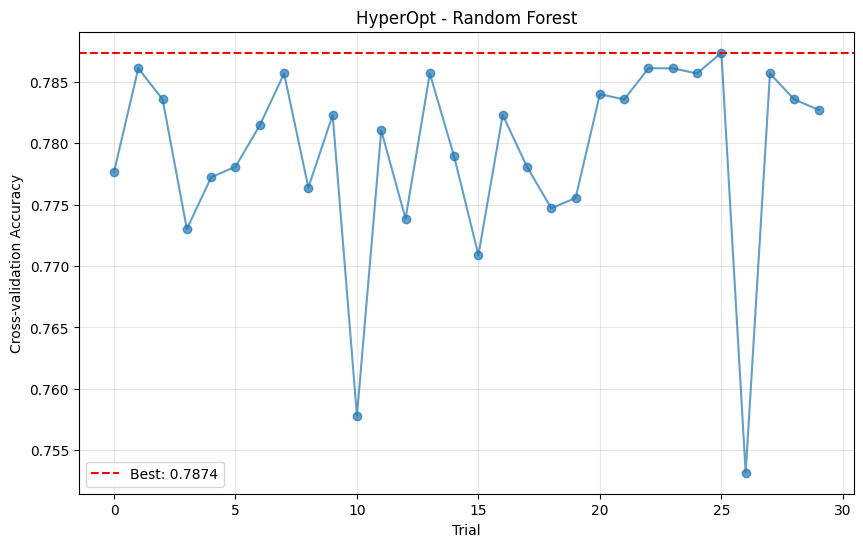

In [28]:
# 최적화 결과 상세 분석
print("=== 최적화 결과 상세 분석 ===")

# trials.best_trial 정보 출력
print("trials.best_trial:")
print(trials.best_trial)

# 최고 성능의 정확도 출력
best_accuracy = -trials.best_trial['result']['loss']
print(f"\n최고 교차검증 정확도: {best_accuracy:.4f}")

# 최적 파라미터를 정수형으로 변환하여 출력
optimal_params = {
    'n_estimators': int(best_val['n_estimators']),
    'max_depth': int(best_val['max_depth']),
    'min_samples_split': int(best_val['min_samples_split']),
    'min_samples_leaf': int(best_val['min_samples_leaf']),
    'max_features': best_val['max_features'],
    'bootstrap': best_val['bootstrap'],
    'random_state': 42,
    'n_jobs': -1
}

print(f"\n최적 하이퍼파라미터 (정수형 변환):")
for key, value in optimal_params.items():
    print(f"  {key}: {value}")

# 최적화 과정에서의 성능 변화 시각화
import matplotlib.pyplot as plt

accuracies = [-trial['result']['loss'] for trial in trials.trials]
plt.figure(figsize=(10, 6))
plt.plot(accuracies, 'o-', alpha=0.7)
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Best: {best_accuracy:.4f}')
plt.xlabel('Trial')
plt.ylabel('Cross-validation Accuracy')
plt.title('HyperOpt - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== 수정된 최적 하이퍼파라미터로 Random Forest 모델 재훈련 ===
수정된 최적 하이퍼파라미터:
  n_estimators: 500 (int)
  max_depth: 19 (int)
  min_samples_split: 20 (int)
  min_samples_leaf: 3 (int)
  max_features: None (NoneType)
  bootstrap: False (bool)
  random_state: 42 (int)
  n_jobs: -1 (int)

최적화된 Random Forest 모델 훈련 완료!

=== 최적화된 Random Forest 모델 평가 ===
Training Score  : 0.878698224852071
Testing  Score  : 0.8076923076923077
Cross Validation Score : 0.767098420174664

=== 최적화된 Random Forest 모델 성능 지표 ===
Accuracy        : 0.8076923076923077
Confusion Matrix:
 [[286  33]
 [ 47  50]]
Precision       : 0.6024096385542169
Recall          : 0.5154639175257731
F1 Score        : 0.5555555555555556

=== 기존 모델과 성능 비교 ===
기존 Random Forest 정확도: 0.8269
최적화된 Random Forest 정확도: 0.8077
성능 향상: -0.0192


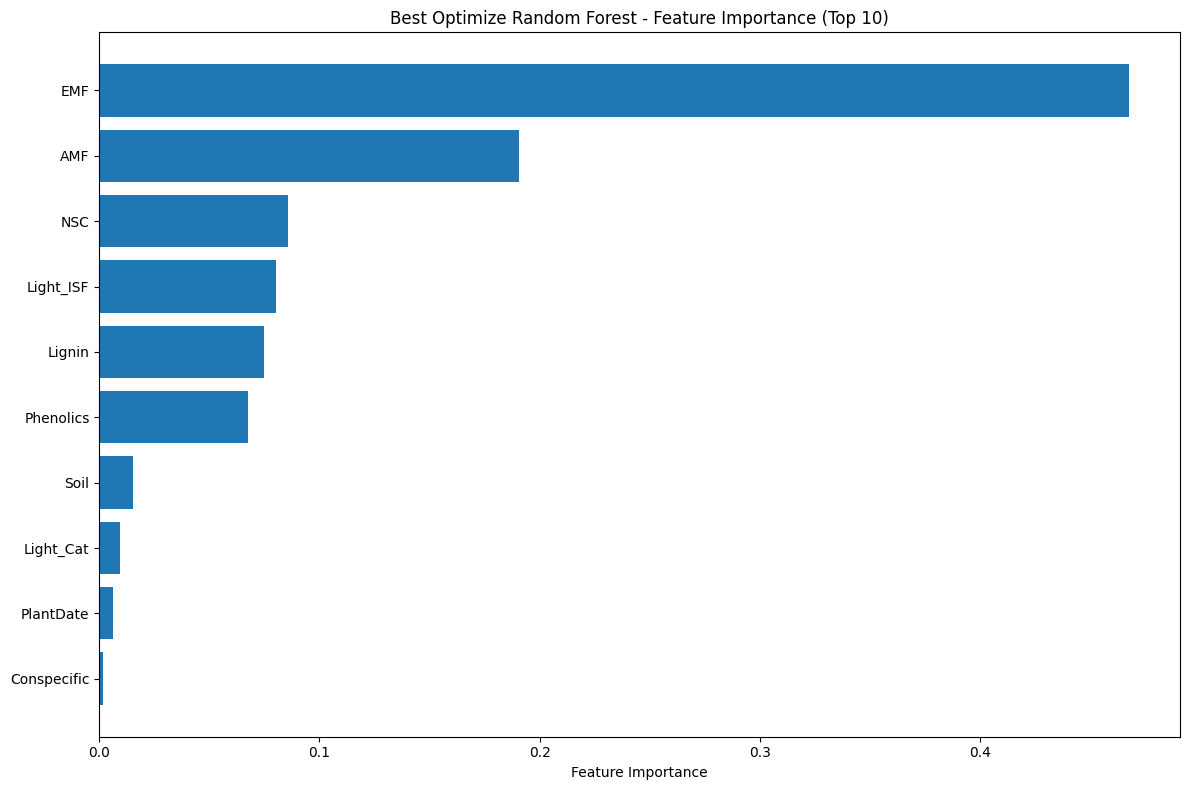

In [29]:
# 최적 하이퍼파라미터로 Random Forest 모델 재훈련 및 평가
print("=== 수정된 최적 하이퍼파라미터로 Random Forest 모델 재훈련 ===")

# max_features 매핑 (HyperOpt 결과를 RandomForest 파라미터로 변환)
max_features_mapping = {0: None, 1: 'sqrt', 2: 'log2'}

# 최적 파라미터를 적절한 타입으로 변환
optimal_params_fixed = {
    'n_estimators': int(best_val['n_estimators']),
    'max_depth': int(best_val['max_depth']),
    'min_samples_split': int(best_val['min_samples_split']),
    'min_samples_leaf': int(best_val['min_samples_leaf']),
    'max_features': max_features_mapping[best_val['max_features']],  # 정수를 문자열로 변환
    'bootstrap': bool(best_val['bootstrap']),  # bool 타입으로 변환
    'random_state': 42,
    'n_jobs': -1
}

print("수정된 최적 하이퍼파라미터:")
for key, value in optimal_params_fixed.items():
    print(f"  {key}: {value} ({type(value).__name__})")

# 최적 파라미터로 Random Forest 모델 생성
best_rf = RandomForestClassifier(**optimal_params_fixed)

# 전체 훈련 데이터로 모델 재훈련
best_rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_optimized = best_rf.predict(X_test)

print("\n최적화된 Random Forest 모델 훈련 완료!")

# 훈련모델 평가 출력
print("\n=== 최적화된 Random Forest 모델 평가 ===")
train_model_evaluation(best_rf, X_train, y_train, X_test, y_test)

# 평가지표 출력
print("\n=== 최적화된 Random Forest 모델 성능 지표 ===")
evaluate_binary_classification(y_test, y_pred_optimized)

# 기존 모델과 성능 비교
print("\n=== 기존 모델과 성능 비교 ===")
print(f"기존 Random Forest 정확도: {accuracy_score(y_test, rf.predict(X_test)):.4f}")
print(f"최적화된 Random Forest 정확도: {accuracy_score(y_test, y_pred_optimized):.4f}")
print(f"성능 향상: {accuracy_score(y_test, y_pred_optimized) - accuracy_score(y_test, rf.predict(X_test)):.4f}")

# 특성 중요도 시각화
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns

# 특성 중요도 상위 10개 시각화
top_features_idx = feature_importance.argsort()[-10:][::-1]
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features_idx)), feature_importance[top_features_idx])
plt.yticks(range(len(top_features_idx)), [feature_names[i] for i in top_features_idx])
plt.xlabel('Feature Importance')
plt.title('Best Optimize Random Forest - Feature Importance (Top 10)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# 최종 요약 및 결과 저장
print("=== HyperOpt Random Forest 하이퍼파라미터 튜닝 최종 요약 ===")
print("\n1. 탐색한 하이퍼파라미터:")
for key, value in search_space.items():
    print(f"   - {key}: {value}")

print(f"\n2. 최적화 시도 횟수: {len(trials.trials)}")

print(f"\n3. 최적 하이퍼파라미터 (수정된 버전):")
for key, value in optimal_params_fixed.items():
    print(f"   - {key}: {value}")

print(f"\n4. 최고 교차검증 정확도: {best_accuracy:.4f}")

print(f"\n5. 테스트 데이터 정확도: {accuracy_score(y_test, y_pred_optimized):.4f}")

print(f"\n6. 기존 모델 대비 성능 향상: {accuracy_score(y_test, y_pred_optimized) - accuracy_score(y_test, rf.predict(X_test)):.4f}")

# 모델 저장 (선택사항)
# import joblib
# joblib.dump(best_rf, 'best_random_forest_model.pkl')
# print("\n최적화된 모델이 'best_random_forest_model.pkl'로 저장되었습니다.")

print("\n=== HyperOpt 튜닝 완료! ===")


=== HyperOpt Random Forest 하이퍼파라미터 튜닝 최종 요약 ===

1. 탐색한 하이퍼파라미터:
   - n_estimators: 0 float
1   hyperopt_param
2     Literal{n_estimators}
3     quniform
4       Literal{100}
5       Literal{500}
6       Literal{50}
   - max_depth: 0 float
1   hyperopt_param
2     Literal{max_depth}
3     quniform
4       Literal{3}
5       Literal{20}
6       Literal{1}
   - min_samples_split: 0 float
1   hyperopt_param
2     Literal{min_samples_split}
3     quniform
4       Literal{2}
5       Literal{20}
6       Literal{1}
   - min_samples_leaf: 0 float
1   hyperopt_param
2     Literal{min_samples_leaf}
3     quniform
4       Literal{1}
5       Literal{10}
6       Literal{1}
   - max_features: 0 switch
1   hyperopt_param
2     Literal{max_features}
3     randint
4       Literal{3}
5   Literal{None}
6   Literal{sqrt}
7   Literal{log2}
   - bootstrap: 0 switch
1   hyperopt_param
2     Literal{bootstrap}
3     randint
4       Literal{2}
5   Literal{True}
6   Literal{False}
   - random_state: 42

2. 최적화 